In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importar librerías
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from datetime import datetime

#Leer el archivo de la base de datos
df = pd.read_csv('/content/drive/MyDrive/datasets/datos_bbdd.csv')

In [ ]:
df

,area,temp,hum,fecha,hora
0,1,20.16,60.44,3/7/2024,08:54:46
1,2,20.13,61.94,3/7/2024,09:06:25
2,2,19.40,65.96,3/7/2024,09:13:33
3,1,20.89,60.60,3/7/2024,09:22:10
4,1,20.57,56.71,3/7/2024,09:32:08
...,...,...,...,...,...
8923,2,20.17,51.32,31/7/2024,20:57:49
8924,2,20.09,52.01,31/7/2024,21:38:06
8925,2,20.08,53.92,31/7/2024,22:48:26
8926,2,20.14,54.03,31/7/2024,23:18:48


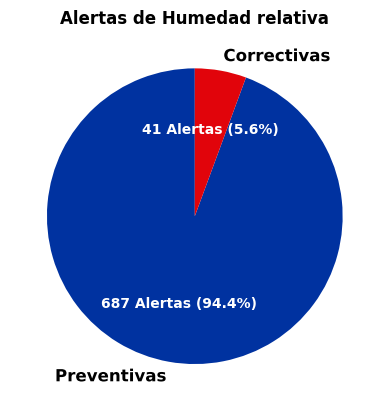

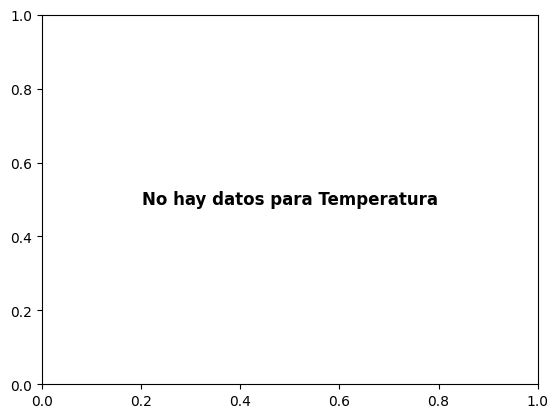

In [3]:
# Funciones de clasificación
def classify_humidity(hum):
    if (63 < hum < 70) or (20 < hum < 37):
        return 'Preventivas'
    elif (hum > 70) or (hum < 20):
        return 'Correctivas'
    else:
        return 'Normal'

def classify_temp(temp):
    if (27.7 < temp < 30) or (5 < temp < 6.3):
        return 'Preventiva'
    elif (temp > 30) or (temp < 5):
        return 'Correctiva'
    else:
        return 'Normal'

# Aplicar las funciones de clasificación
df['alerta_hum'] = df['hum'].apply(classify_humidity)
df['alerta_temp'] = df['temp'].apply(classify_temp)

# Contar las alertas para humedad
alertas_hum = df['alerta_hum'].value_counts(dropna=False)
sizes_hum = [alertas_hum.get('Preventivas', 0), alertas_hum.get('Correctivas', 0)]
labels_hum = ['Preventivas', 'Correctivas']
colors_hum = ['#0032A0','#E1040B']

# Crear gráfico de pastel para humedad
fig, ax = plt.subplots()

def func_hum(pct, allvals):
    absolute = int(pct / 100. * sum(allvals))
    return f'{absolute} Alertas ({pct:.1f}%)'

# Evitar errores si sizes_hum contiene NaN o ceros
if sum(sizes_hum) > 0:
    wedges, texts, autotexts = ax.pie(sizes_hum, labels=labels_hum, colors=colors_hum,
                                      autopct=lambda pct: func_hum(pct, sizes_hum), startangle=90,
                                      textprops=dict(color='white', fontweight='bold'))
    for text in texts:
        text.set_fontsize(12)
        text.set_color('black')
        text.set_path_effects([path_effects.withStroke(linewidth=2, foreground='white')])
    ax.set_title('Alertas de Humedad relativa', color='black', fontweight='bold')
else:
    ax.text(0.5, 0.5, 'No hay datos para Humedad', horizontalalignment='center', verticalalignment='center', fontsize=12, color='black', fontweight='bold')

plt.show()

# Contar las alertas para temperatura
alertas_temp = df['alerta_temp'].value_counts(dropna=False)
sizes_temp = [alertas_temp.get('Preventiva', 0), alertas_temp.get('Correctiva', 0)]
labels_temp = ['Preventiva', 'Correctiva']
colors_temp = ['#ff9999','#66b3ff']

# Crear gráfico de pastel para temperatura
fig, ax = plt.subplots()

def func_temp(pct, allvals):
    absolute = int(pct / 100. * sum(allvals))
    return f'{absolute} Alertas ({pct:.1f}%)'

# Evitar errores si sizes_temp contiene NaN o ceros
if sum(sizes_temp) > 0:
    wedges, texts, autotexts = ax.pie(sizes_temp, labels=labels_temp, colors=colors_temp,
                                      autopct=lambda pct: func_temp(pct, sizes_temp), startangle=90,
                                      textprops=dict(color='black', fontweight='bold'))
    for text in texts:
        text.set_fontsize(12)
        text.set_color('black')
        text.set_path_effects([path_effects.withStroke(linewidth=2, foreground='white')])
    ax.set_title('Alertas de Temperatura', color='black', fontweight='bold')
else:
    ax.text(0.5, 0.5, 'No hay datos para Temperatura', horizontalalignment='center', verticalalignment='center', fontsize=12, color='black', fontweight='bold')

plt.show()
